## `19IT031 Aman Desai`

## Practical - 5 `Logistic regression - Binary and Multiclass classification using sklearn`

## Implement Logistic regression using sklearn

#### Select Dataset of your choice for binary classification and respond to the following questions.

In [1]:
import math
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

## Binary Classification (Two class classification)

In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Now lets check if their are any null values present in the dataset or not.

In [3]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We can see that there are 0 null values present so we can proceed further by taking the dataset into consideration.

#### 1. Why do you want to apply classification to the selected dataset? Discuss the full story behind the dataset.

Here i have selected the dataset which has the data of whether the patient is diabetic or not based on the parameters like Age, BMI, SkinThickness, Glucose level, Blood Pressure, Number of times pregnant and more.

#### 2. How many total observations are in data?

In [4]:
dataset.shape

(768, 9)

We can see that there are total 768 observations and 9 features.

#### 3. How many independent variables?

There are total 8 independent variables.

#### 4. Which is the dependent variable?

Here `Outcome` is the dependent variable.

#### 5. Which are the most useful variable in classification? Prove using correlation.

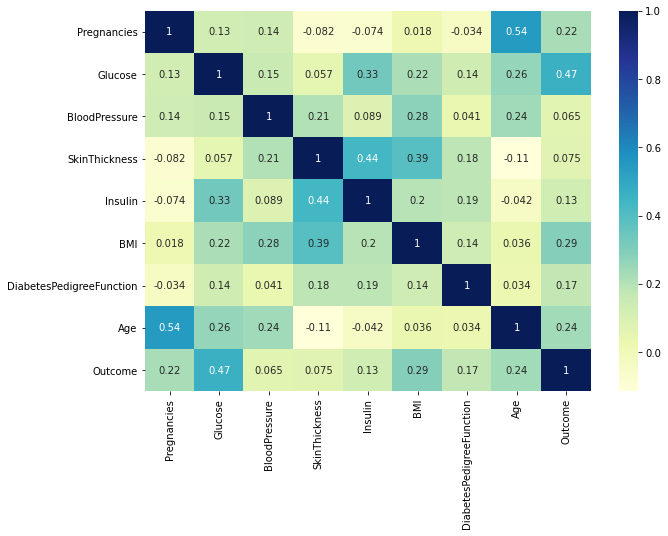

In [5]:
plt.figure(figsize=(10,7))
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot = True)
plt.show()

From the above graph of correlation we can say that `Glucose`,`BMI` and `Age` are the main 3 variables that will be helpful for predicting the outcome.

Text(0, 0.5, 'Outcome')

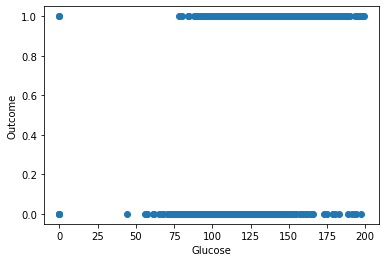

In [6]:
X = dataset.drop('Outcome', axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X1 = dataset.Glucose
X2 = dataset.BMI
Y = dataset.Outcome

plt.scatter(X1, Y)
plt.xlabel('Glucose')
plt.ylabel('Outcome')

Text(0, 0.5, 'Outcome')

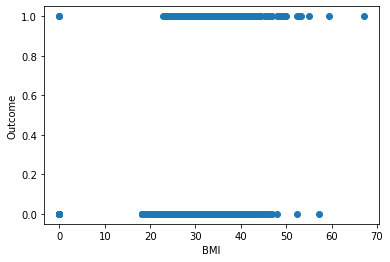

In [7]:
plt.scatter(X2, Y)
plt.xlabel('BMI')
plt.ylabel('Outcome')

#### Splitting the data

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

#### 6. Logistic function

In [9]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

print("Accuracy: ", lr_model.score(x_test, y_test))

Accuracy:  0.7662337662337663


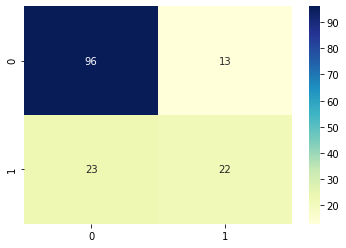

In [10]:
y_pred = lr_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, cmap="YlGnBu", annot = True)
plt.show()

#### Custom LR

In [11]:
print(f"coefficient = {lr_model.coef_}, intercept = {lr_model.intercept_}")

coefficient = [[ 0.52967604  1.18040113 -0.2548193   0.05888219 -0.15333604  0.67025069
   0.33218677  0.08256907]], intercept = [-0.82401128]


In [12]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def custom_LR(preg, glucose, bp, skinthickness, insulin, bmi, dpf, age):
    z = (0.53 * preg) + (1.18 * glucose) + (-0.25 * bp) + (0.06 * skinthickness) + (-0.15 * insulin) + (0.67+bmi) + (0.33 * dpf) + (0.08 * age) - 0.82
    y = sigmoid(z)
    return y

In [13]:
y_c_pred = []

for i in range(len(y_test)):
    res = custom_LR(x_test[i][0], x_test[i][1],  x_test[i][2], x_test[i][3], x_test[i][4], x_test[i][5], x_test[i][6], x_test[i][7])
    if res > 0.5:  # if greater than 0.5 then the person will be diabetic
        res = 1
    else:
        res = 0
    y_c_pred.append(res)

### Testing our sigmoid function 

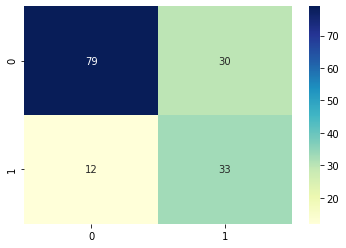

In [14]:
cm = confusion_matrix(y_test, y_c_pred)

sns.heatmap(cm, cmap="YlGnBu", annot = True)
plt.show()

### Here in binary classification model we are getting `76.62%` accuracy

## Multiclass classification

In [15]:
dataset2 = pd.read_csv('mobile_info.csv')
dataset2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [16]:
X = dataset2.drop('price_range', axis=1)
Y = dataset2['price_range']

scaler2 = StandardScaler()
X = scaler2.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

lr_mc_model = LogisticRegression().fit(x_train, y_train)
print("Accuracy: ", lr_mc_model.score(x_test, y_test))

Accuracy:  0.955


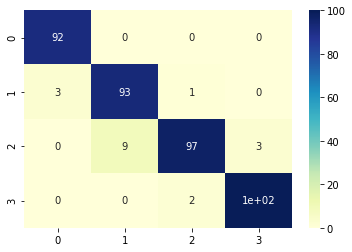

In [17]:
y_pred = lr_mc_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, cmap="YlGnBu", annot = True)
plt.show()

### we can observe that in the case of multiclass classification model we are getting `95.5%` accuracy

## Conclusion:
By performing this practical i learned about how to sklearn API and its use in logistic regression for both binary and multiclass.